In [61]:
# library imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Importing data set csv by referencing data directory
dataset = pd.read_csv("../data/Final.csv")
# removes problematic entries from dataset
dataset = dataset[(dataset["Entity"] != "World") & (dataset["Entity"] != "North America")]




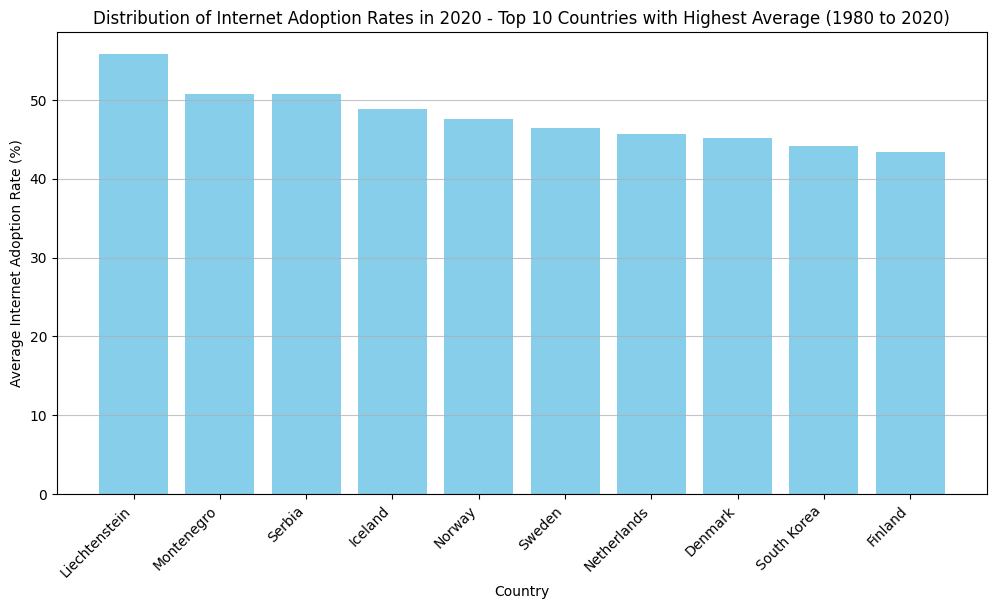

In [48]:
# creating new data set with data selected from year range
dataset_avg = dataset[dataset["Year"].between(1980, 2020)]

# data average for each country or "entity" calculation
avg_internet_adoption = dataset_avg.groupby("Entity")["Internet Users(%)"].mean().reset_index()

# Confining data to 10 largest for better visualization
top_10_countries_avg = avg_internet_adoption.nlargest(10, "Internet Users(%)")

# plotting data as bar graph and labeling
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries_avg["Entity"], top_10_countries_avg["Internet Users(%)"], color='skyblue')
plt.title('Distribution of Internet Adoption Rates in 2020 - Top 10 Countries with Highest Average (1980 to 2020)')
plt.xlabel('Country')
plt.ylabel('Average Internet Adoption Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.show()

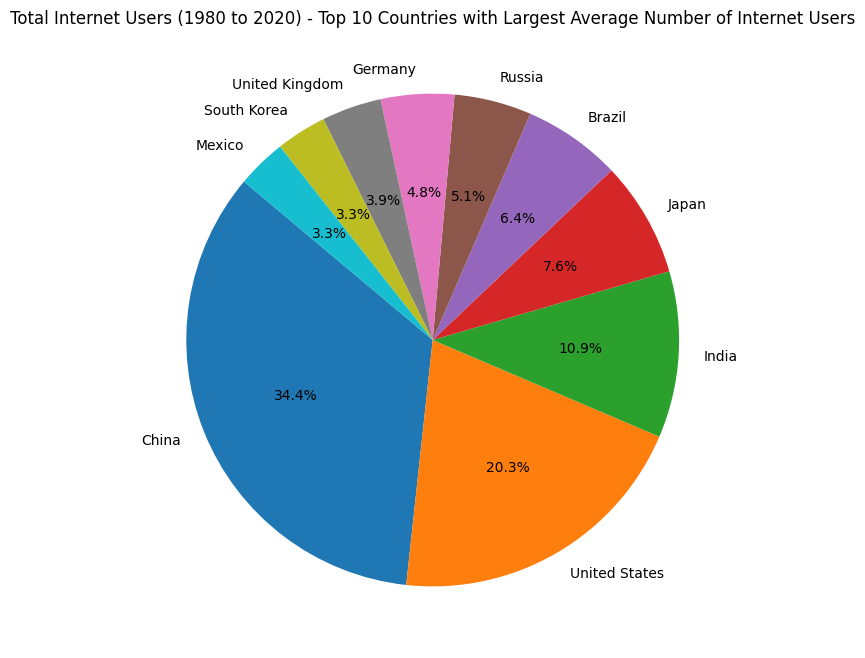

In [59]:
# using previously extracted data to create a pie chart

plt.figure(figsize=(8, 8))
plt.pie(top_10_countries_avg["No. of Internet Users"], labels=top_10_countries_avg["Entity"], autopct='%1.1f%%', startangle=140)
plt.title('Total Internet Users (1980 to 2020) - Top 10 Countries with Largest Average Number of Internet Users')
plt.show()

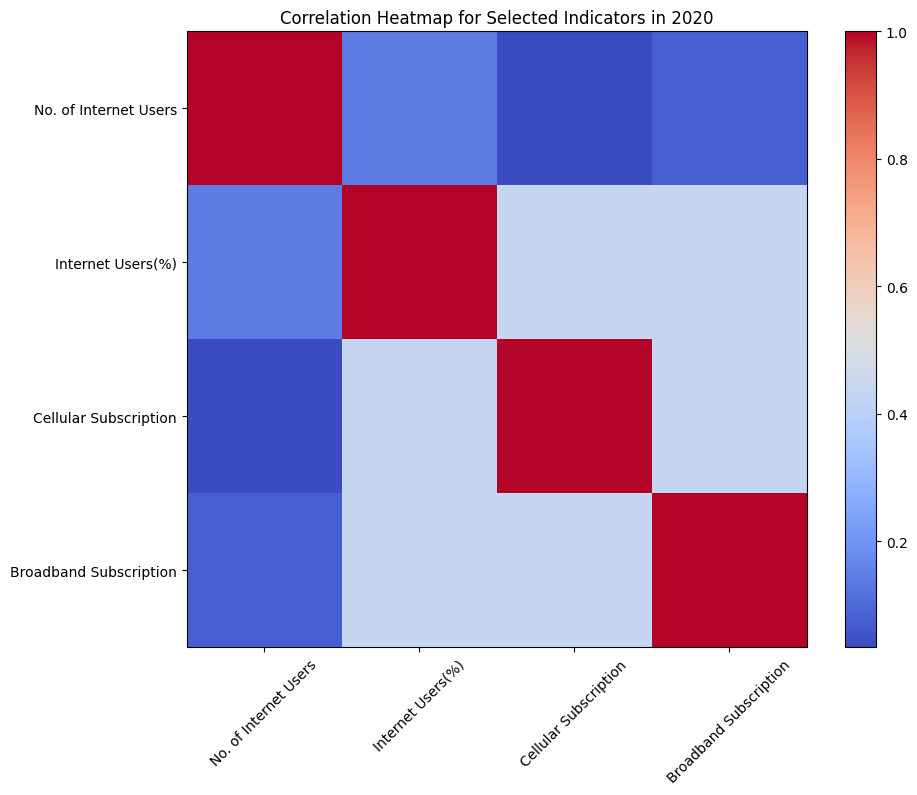

In [62]:
# gathers only 2020 data
dataset_2020 = dataset[dataset["Year"] == 2020]

# select correlation columns from dataset
selected_columns = ["No. of Internet Users", "Internet Users(%)", "Cellular Subscription", "Broadband Subscription"]
correlation_matrix = dataset_2020[selected_columns].corr()

# plots correlation heatmap and key
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(selected_columns)), selected_columns, rotation=45)
plt.yticks(range(len(selected_columns)), selected_columns)
plt.title('Correlation Heatmap for Selected Indicators in 2020')
plt.show()

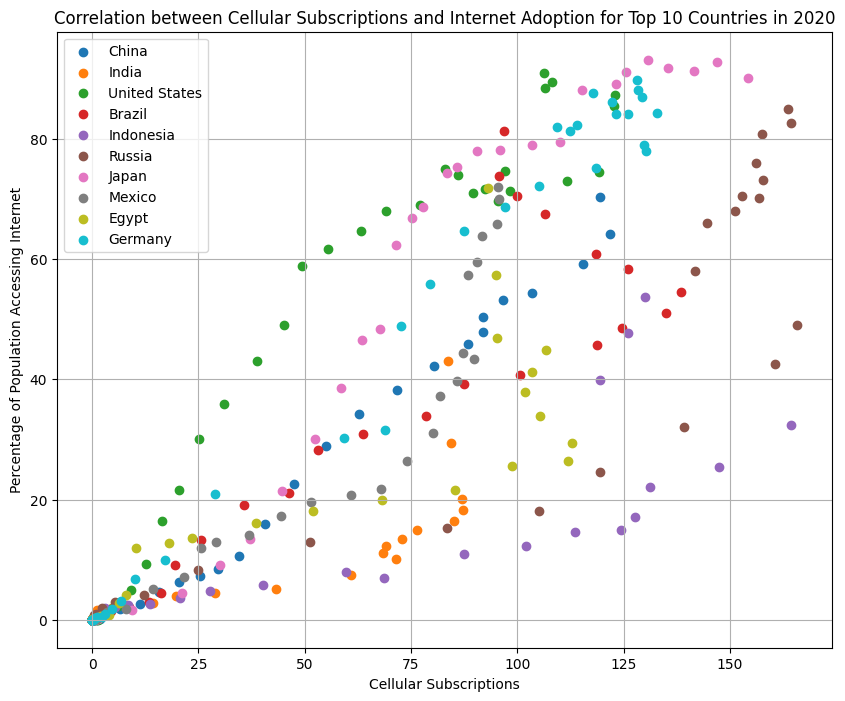

In [64]:
# creates scatter plot
plt.figure(figsize=(10, 8))

# Loops through top 10 countries to plot data
for country in top_10_countries_2020["Entity"]:
    country_data = dataset[dataset["Entity"] == country]
    plt.scatter(country_data["Cellular Subscription"], country_data["Internet Users(%)"], label=country)

# adds plot labels
plt.title('Correlation between Cellular Subscriptions and Internet Adoption for Top 10 Countries in 2020')
plt.xlabel('Cellular Subscriptions')
plt.ylabel('Percentage of Population Accessing Internet')
plt.legend()
plt.grid(True)

# shows visualization
plt.show()

c:\Users\ice\scoop\apps\python\current\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


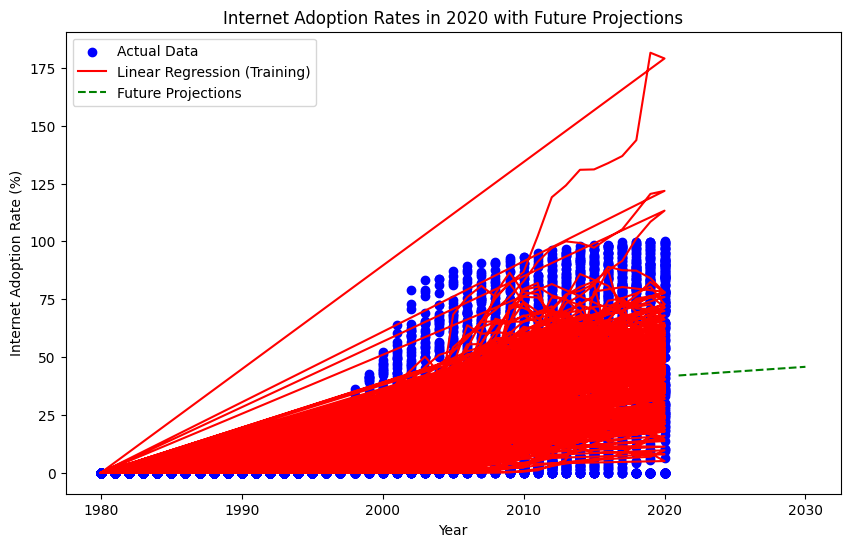

In [76]:

# selects relevant columns from dataset
selected_columns = ["Cellular Subscription", "No. of Internet Users", "Internet Users(%)"]
dataset_selected = dataset[selected_columns]

# select target variable "Internet Users(%)" for prediction model
X = dataset_selected[["Cellular Subscription", "No. of Internet Users"]]
y = dataset_selected["Internet Users(%)"]

# creates linear regression model
model = LinearRegression()

# fit the model with x and y
model.fit(X, y)

# generates prediction data
future_data = [[future_mobile_subscriptions, future_internet_users] for future_mobile_subscriptions, future_internet_users in zip(range(101, 111), range(1001, 1011))]
future_predictions = model.predict(future_data)

# creates data frame to fix errors
future_projections_dataset = pd.DataFrame({"Year": range(2021, 2031), "Predicted Internet Users(%)": future_predictions})

# plots data points
plt.figure(figsize=(10, 6))
plt.scatter(dataset["Year"], dataset["Internet Users(%)"], color='blue', label='Actual Data')

# plots regression training and prediction
plt.plot(dataset["Year"], model.predict(X), color='red', label='Linear Regression (Training)')
plt.plot(future_projections_dataset["Year"], future_projections_dataset["Predicted Internet Users(%)"], color='green', linestyle='--', label='Future Projections')
plt.title('Internet Adoption Rates in 2020 with Future Projections')
plt.xlabel('Year')
plt.ylabel('Internet Adoption Rate (%)')
plt.legend()
plt.show()


Correlation between Cellular Subscriptions and Internet Adoption: 0.8213565856275412
Model Coefficients: [4.16255852e-01 6.33893624e-08]


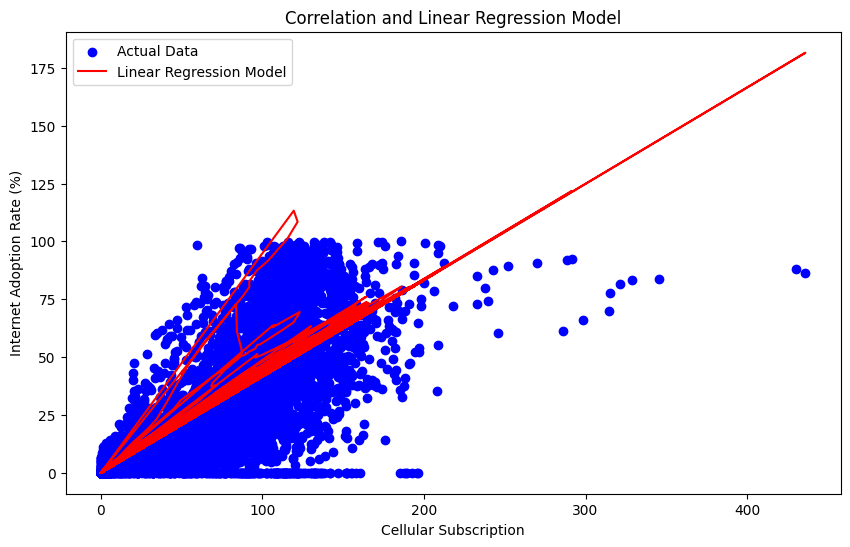

In [77]:
# selects relevant columns from dataset
selected_columns = ["Cellular Subscription", "No. of Internet Users", "Internet Users(%)"]
dataset_selected = dataset[selected_columns]

# select target variable "Internet Users(%)" for prediction model
X = dataset_selected[["Cellular Subscription", "No. of Internet Users"]]
y = dataset_selected["Internet Users(%)"]

# creates linear regression model
model = LinearRegression()

# fit the model with x and y
model.fit(X, y)

# calculates data correlation value and coefficients
correlation = dataset_selected["Cellular Subscription"].corr(dataset_selected["Internet Users(%)"])
coefficients = model.coef_

# outputs correlation and coefficents
print(f"Correlation between Cellular Subscriptions and Internet Adoption: {correlation}")
print(f"Model Coefficients: {coefficients}")

# Plots data
plt.figure(figsize=(10, 6))
plt.scatter(X["Cellular Subscription"], y, color='blue', label='Actual Data')

# Plots linear regression model
plt.plot(X["Cellular Subscription"], model.predict(X), color='red', label='Linear Regression Model')
plt.title('Correlation and Linear Regression Model')
plt.xlabel('Cellular Subscription')
plt.ylabel('Internet Adoption Rate (%)')
plt.legend()
plt.show()


In [78]:
# Selection of variables and target
features = dataset[["Cellular Subscription", "No. of Internet Users"]]
target = dataset["Internet Users(%)"]

# creates data training sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# creates linear regression model
model = LinearRegression()

# fits linear regression model
model.fit(X_train, y_train)

# creates data prediction
y_pred = model.predict(X_test)

# calculates r squared
r_squared = r2_score(y_test, y_pred)

# outputs r squared
print("R-squared:", r_squared)


R-squared: 0.6737199276204084


In [80]:
# selection of features and target
features = dataset[["Cellular Subscription"]]
target = dataset["Internet Users(%)"]

# creates linear regression model
model = LinearRegression()

# fits linear regression model
model.fit(features, target)

# gets from linear regression model coefficients
coefficients = model.coef_


# outputs coefficient

print(f"{feature}: {coef}")



Cellular Subscription: 0.4232201374636429


In [90]:
# Selection of columns for linear regression
selected_columns = ["Year", "Internet Users(%)"]
dataset_selected = dataset[selected_columns]

# select feature and target variable
X = dataset_selected[["Year"]]
y = dataset_selected["Internet Users(%)"]

# creates linear regression model
model = LinearRegression()

# fits linear regression model
model.fit(X, y)

# outputs coefficents, intercept and slope
print("Coefficients:")
print("Intercept:", model.intercept_)
print("Slope (Coefficient for Year):", model.coef_[0])

# linear regression model predicts future data
future_predictions = model.predict(future_years)

# outputs predicted data for each year using loop
print("\nFuture Predictions:")
for year, prediction in zip(future_years.flatten(), future_predictions):
    print(f"Year: {year}, Predicted Internet Adoption Rate: {prediction:.2f}")


Coefficients:
Intercept: -2932.3012731767326
Slope (Coefficient for Year): 1.4745112544505223

Future Predictions:
Year: 2021, Predicted Internet Adoption Rate: 47.69
Year: 2022, Predicted Internet Adoption Rate: 49.16
Year: 2023, Predicted Internet Adoption Rate: 50.63
Year: 2024, Predicted Internet Adoption Rate: 52.11
Year: 2025, Predicted Internet Adoption Rate: 53.58
Year: 2026, Predicted Internet Adoption Rate: 55.06
Year: 2027, Predicted Internet Adoption Rate: 56.53
Year: 2028, Predicted Internet Adoption Rate: 58.01
Year: 2029, Predicted Internet Adoption Rate: 59.48
Year: 2030, Predicted Internet Adoption Rate: 60.96


c:\Users\ice\scoop\apps\python\current\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Highest adoption rate country: Iceland with rate of 151.83%.


c:\Users\ice\scoop\apps\python\current\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


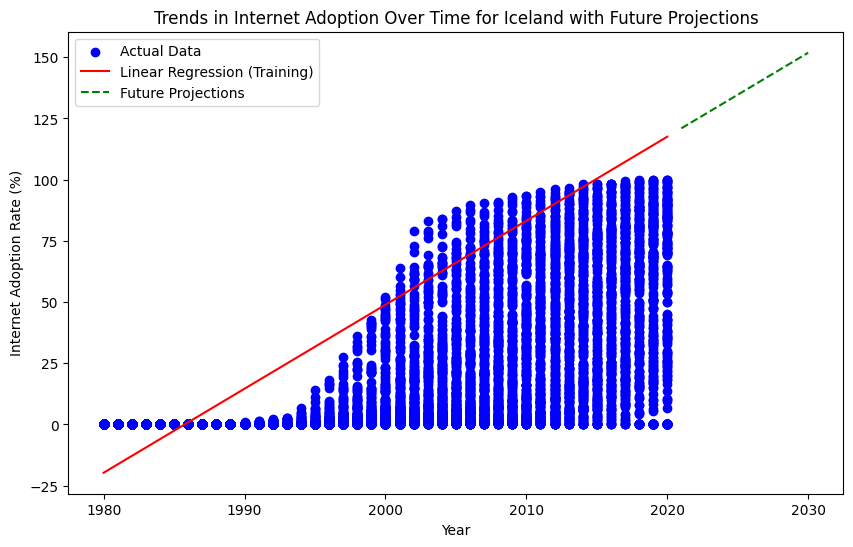

In [96]:
# selects columns for subset of data
selected_columns = ["Entity", "Year", "Internet Users(%)"]
dataset_selected = dataset[selected_columns]

# selects feature and target variables
X = dataset_selected[["Year"]]
y = dataset_selected["Internet Users(%)"]

# creates dictionaries to store country prediction data
models = {}
predictions = {}

# loops through country dataset
for country in dataset_selected["Entity"].unique():
    country_data = dataset_selected[dataset_selected["Entity"] == country]
    X_country = country_data[["Year"]].values.reshape(-1, 1)
    y_country = country_data["Internet Users(%)"]

    # creates linear regression model for each country
    model = LinearRegression()
    model.fit(X_country, y_country)

    # adds model to dictionary
    models[country] = model


    future_predictions = model.predict(future_years)
    
    # adds prediction data to dictionary
    predictions[country] = future_predictions

# identifies country with higehst predicted adoption rate
max_country = max(predictions, key=lambda country: predictions[country][-1])

# outputs country with highest adoption rate projections
print(f"Highest adoption rate country: {max_country} with rate of {max_adoption_rate:.2f}%.")

# plots the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')

#plots the linear regression training and predictions
plt.plot(X, models[max_country].predict(X), color='red', label='Linear Regression (Training)')
plt.plot(future_years, predictions[max_country], color='green', linestyle='--', label='Future Projections')
plt.title(f'Trends in Internet Adoption Over Time for {max_country} with Future Projections')
plt.xlabel('Year')
plt.ylabel('Internet Adoption Rate (%)')
plt.legend()
plt.show()
